In [1]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv file
dataframe = pd.read_csv("IPL 2024 Dataset.csv", encoding= "unicode_escape")

# make a copy of original dataframe
df = dataframe.copy()

In [3]:
df.shape

(74, 16)

In [4]:
df.head()

,Sr. No.,Venue,Stage,Team 1,Team 2,Toss Winner,Toss decision,First Batting,Second batting,First Innings Score,second Innings Score,First Innings Run Rate,Second Innings Run Rate,Winner,Won by,Player of the match
0,1,"MA Chidambaram Stadium, Chennai",Group Stage,Chennai Super Kings,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Batting,Royal Challengers Bengaluru,Chennai Super Kings,173/6,176/4,RR 8.65,RR 9.43,CSK,6 wickets,Mustafizur Rahman
1,2,Maharaja Yadavindra Singh International Cricke...,Group Stage,Punjab Kings,Delhi Capitals,Punjab Kings,Bowling,Delhi Capitals,Punjab Kings,174/9,177/6,RR 8.70,RR 9.16,PBKS,4 wickets,Sam Curran
2,3,"Eden Gardens, Kolkata",Group Stage,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,Bowling,Kolkata Knight Riders,Sunrisers Hyderabad,208/7,204/7,RR 10.40,RR 10.20,KKR,4 runs,Andre Russell
3,4,"Sawai Mansingh Stadium, Jaipur",Group Stage,Rajasthan Royals,Lucknow Super Giants,Rajasthan Royals,Batting,Rajasthan Royals,Lucknow Super Giants,193/4,173/6,RR 9.65,RR 8.65,RR,20 runs,Sanju Samson
4,5,"Narendra Modi Stadium, Ahmedabad",Group Stage,Gujarat Titans,Mumbai Indians,Mumbai Indians,Bowling,Gujarat Titans,Mumbai Indians,168/6,162/9,RR 8.40,RR 8.10,GT,6 runs,Sai Sudharsan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sr. No.                   74 non-null     int64 
 1   Venue                     74 non-null     object
 2   Stage                     74 non-null     object
 3   Team 1                    74 non-null     object
 4   Team 2                    74 non-null     object
 5   Toss Winner               72 non-null     object
 6   Toss decision             72 non-null     object
 7   First Batting             74 non-null     object
 8   Second batting            74 non-null     object
 9   First  Innings Score      71 non-null     object
 10  second Innings Score      71 non-null     object
 11  First  Innings Run Rate   71 non-null     object
 12  Second  Innings Run Rate  71 non-null     object
 13  Winner                    71 non-null     object
 14  Won by                    71

## Data Processing

In [6]:
# check for null values
df.isnull().sum()

Sr. No.                     0
Venue                       0
Stage                       0
Team 1                      0
Team 2                      0
Toss Winner                 2
Toss decision               2
First Batting               0
Second batting              0
First  Innings Score        3
second Innings Score        3
First  Innings Run Rate     3
Second  Innings Run Rate    3
Winner                      3
Won by                      3
Player of the match         3
dtype: int64

In [7]:
# drop null values (matches with no result/abandoned matches)
df.dropna(inplace=True)

In [8]:
df.columns

Index(['Sr. No.', 'Venue', 'Stage', 'Team 1', 'Team 2', 'Toss Winner',
       'Toss decision', 'First Batting', 'Second batting',
       'First  Innings Score ', 'second Innings Score',
       'First  Innings Run Rate', 'Second  Innings Run Rate', 'Winner',
       'Won by', 'Player of the match'],
      dtype='object')

In [9]:
# standardise column headers
df.columns = df.columns.str.strip().str.lower().str.split().str.join(" ").str.replace(" ","_")

In [10]:
df.columns

Index(['sr._no.', 'venue', 'stage', 'team_1', 'team_2', 'toss_winner',
       'toss_decision', 'first_batting', 'second_batting',
       'first_innings_score', 'second_innings_score', 'first_innings_run_rate',
       'second_innings_run_rate', 'winner', 'won_by', 'player_of_the_match'],
      dtype='object')

In [11]:
df["venue"].unique()

array(['MA Chidambaram Stadium,\xa0Chennai',
       'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur,\xa0Chandigarh',
       'Eden Gardens,\xa0Kolkata', 'Sawai Mansingh Stadium,\xa0Jaipur',
       'Narendra Modi Stadium,\xa0Ahmedabad',
       'M.Chinnaswamy Stadium,\xa0Bengaluru',
       'Rajiv Gandhi International Stadium, Uppal,\xa0Hyderabad',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium,\xa0Lucknow',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,\xa0Visakhapatnam',
       'Wankhede Stadium,\xa0Mumbai', 'Arun Jaitley Stadium,\xa0Delhi',
       'Himachal Pradesh Cricket Association Stadium,\xa0Dharamsala',
       'Barsapara Cricket Stadium,\xa0Guwahati'], dtype=object)

In [12]:
# split venue column to extract the location
df[["Stadium","Location1","Location2"]] = df["venue"].str.split(",", expand=True)

In [13]:
# remove extra spaces from column values
clean_columns = list(df.columns)

# create loops for cleaning extra spaces from each columns
for i in clean_columns:
    if df[i].dtype == "object": # handle non-str columns
        df[i] = df[i].str.strip().str.split().str.join(" ")

In [14]:
# changing sub-location to main location
df["Location1"].replace(["Mullanpur","Uppal"],["Chandigarh","Hyderabad"], inplace=True)

In [15]:
# drop Location2 column
df.drop(columns=["Location2"], inplace=True)

In [16]:
# rename location1 to venue_location
df.rename(columns={"Location1": "venue_location"},inplace=True)

In [17]:
# spell check
df["team_1"].unique()

array(['Chennai Super Kings', 'Punjab Kings', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bengaluru', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Delhi Capitals', 'Mumbai Indians',
       'Rajasthan Royal', 'Sunriders Hyderabad', 'Kolkata Knight Risers'],
      dtype=object)

In [18]:
# make corrections in team names
df["team_1"].replace(["Rajasthan Royal","Sunriders Hyderabad","Kolkata Knight Risers"],
                     ["Rajasthan Royals","Sunrisers Hyderabad","Kolkata Knight Riders"], inplace=True)

In [19]:
# change full name to abbreviation for better display
df["team_1"].replace(['Chennai Super Kings', 'Punjab Kings', 'Kolkata Knight Riders',
                      'Rajasthan Royals', 'Gujarat Titans', 'Royal Challengers Bengaluru',
                      'Sunrisers Hyderabad', 'Lucknow Super Giants', 'Delhi Capitals', 'Mumbai Indians'],
                     ['CSK', 'PBKS', 'KKR', 'RR', 'GT', 'RCB', 'SRH', 'LSG', 'DC', 'MI'], inplace=True)

In [20]:
# spell check
df["team_2"].unique()

array(['Royal Challengers Bengaluru', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Gujarat Titans', 'Kolkata Knight Rider',
       'Sunriders Hyderabad', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Chennai Super King', 'Delhi Capital'],
      dtype=object)

In [21]:
# make corrections in team names
df["team_2"].replace(["Sunriders Hyderabad","Kolkata Knight Rider","Chennai Super King","Delhi Capital"],
                     ["Sunrisers Hyderabad","Kolkata Knight Riders","Chennai Super Kings","Delhi Capitals"], inplace=True)

In [22]:
# change full name to abbreviation for better display
df["team_2"].replace(['Chennai Super Kings', 'Punjab Kings', 'Kolkata Knight Riders',
                      'Rajasthan Royals', 'Gujarat Titans', 'Royal Challengers Bengaluru',
                      'Sunrisers Hyderabad', 'Lucknow Super Giants', 'Delhi Capitals', 'Mumbai Indians'],
                     ['CSK', 'PBKS', 'KKR', 'RR', 'GT', 'RCB', 'SRH', 'LSG', 'DC', 'MI'], inplace=True)

In [23]:
# spell check
df["toss_winner"].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Mumbai Indians',
       'Gujarat Titans', 'Delhi Capitals', 'Kolkata Knight Riders',
       'Lucknow Super Giants', 'Chennai Super Kings'], dtype=object)

In [24]:
# change full name to abbreviation for better display
df["toss_winner"].replace(['Chennai Super Kings', 'Punjab Kings', 'Kolkata Knight Riders',
                      'Rajasthan Royals', 'Gujarat Titans', 'Royal Challengers Bengaluru',
                      'Sunrisers Hyderabad', 'Lucknow Super Giants', 'Delhi Capitals', 'Mumbai Indians'],
                     ['CSK', 'PBKS', 'KKR', 'RR', 'GT', 'RCB', 'SRH', 'LSG', 'DC', 'MI'], inplace=True)

In [25]:
# spell check
df["toss_decision"].unique()

array(['Batting', 'Bowling'], dtype=object)

In [26]:
# spell check
df["first_batting"].unique()

array(['Royal Challengers Bengaluru', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Gujarat Titans',
       'Punjab Kings', 'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Mumbai Indians'], dtype=object)

In [27]:
# change full name to abbreviation for better display
df["first_batting"].replace(['Chennai Super Kings', 'Punjab Kings', 'Kolkata Knight Riders',
                      'Rajasthan Royals', 'Gujarat Titans', 'Royal Challengers Bengaluru',
                      'Sunrisers Hyderabad', 'Lucknow Super Giants', 'Delhi Capitals', 'Mumbai Indians'],
                     ['CSK', 'PBKS', 'KKR', 'RR', 'GT', 'RCB', 'SRH', 'LSG', 'DC', 'MI'], inplace=True)

In [28]:
# spell check
df["second_batting"].unique()

array(['Chennai Super Kings', 'Punjab Kings', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Mumbai Indians',
       'Royal Challengers Bengaluru', 'Gujarat Titans', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals'], dtype=object)

In [29]:
# change full name to abbreviation for better display
df["second_batting"].replace(['Chennai Super Kings', 'Punjab Kings', 'Kolkata Knight Riders',
                      'Rajasthan Royals', 'Gujarat Titans', 'Royal Challengers Bengaluru',
                      'Sunrisers Hyderabad', 'Lucknow Super Giants', 'Delhi Capitals', 'Mumbai Indians'],
                     ['CSK', 'PBKS', 'KKR', 'RR', 'GT', 'RCB', 'SRH', 'LSG', 'DC', 'MI'], inplace=True)

In [30]:
# spell check
df["winner"].unique()

array(['CSK', 'PBKS', 'KKR', 'RR', 'GT', 'RCB', 'SRH', 'LSG', 'DC', 'MI'],
      dtype=object)

In [31]:
# split columns
df[["first_innings_score","first_innings_wickets"]] = df["first_innings_score"].str.split("/", expand=True)

df[["second_innings_score","second_innings_wickets"]] = df["second_innings_score"].str.split("/", expand=True)

df[["rr_1","first_innings_run_rate"]] = df["first_innings_run_rate"].str.split(" ", expand=True)

df[["rr_2","second_innings_run_rate"]] = df["second_innings_run_rate"].str.split(" ", expand=True)

df[["won_by","won_type"]] = df["won_by"].str.split(" ", expand=True)

In [32]:
# change the dtype to int
df["first_innings_score"] = pd.to_numeric(df["first_innings_score"], errors="coerce")

df["first_innings_wickets"] = pd.to_numeric(df["first_innings_wickets"], errors="coerce")

df["second_innings_score"] = pd.to_numeric(df["second_innings_score"], errors="coerce")

df["second_innings_wickets"] = pd.to_numeric(df["second_innings_wickets"], errors="coerce")

df["first_innings_run_rate"] = pd.to_numeric(df["first_innings_run_rate"], errors="coerce")

df["second_innings_run_rate"] = pd.to_numeric(df["second_innings_run_rate"], errors="coerce")

In [33]:
# drop unnecessary columns
df.drop(columns=["rr_1","rr_2","won_by"], inplace=True)

In [34]:
# spell check
df["won_type"].unique()

array(['wickets', 'runs', 'run', 'wicket'], dtype=object)

In [35]:
# make spelling correction in won_type column
df["won_type"].replace(["run","wicket"],["runs","wickets"], inplace=True)       

In [36]:
# changing runs to defending and wickets to chasing
df["won_type"].replace(["runs","wickets"],["Defending","Chasing"], inplace=True) 

In [37]:
# create a column "won_by_team"
df["won_by_team"] = np.where(df["toss_winner"] == df["winner"], "Toss Winner","Toss Loser")

In [38]:
# keep only Group Stage match results
df = df[df["stage"] == "Group Stage"]

In [39]:
df.head()

,sr._no.,venue,stage,team_1,team_2,toss_winner,toss_decision,first_batting,second_batting,first_innings_score,...,first_innings_run_rate,second_innings_run_rate,winner,player_of_the_match,Stadium,venue_location,first_innings_wickets,second_innings_wickets,won_type,won_by_team
0,1,"MA Chidambaram Stadium, Chennai",Group Stage,CSK,RCB,RCB,Batting,RCB,CSK,173,...,8.65,9.43,CSK,Mustafizur Rahman,MA Chidambaram Stadium,Chennai,6,4,Chasing,Toss Loser
1,2,Maharaja Yadavindra Singh International Cricke...,Group Stage,PBKS,DC,PBKS,Bowling,DC,PBKS,174,...,8.70,9.16,PBKS,Sam Curran,Maharaja Yadavindra Singh International Cricke...,Chandigarh,9,6,Chasing,Toss Winner
2,3,"Eden Gardens, Kolkata",Group Stage,KKR,SRH,SRH,Bowling,KKR,SRH,208,...,10.40,10.20,KKR,Andre Russell,Eden Gardens,Kolkata,7,7,Defending,Toss Loser
3,4,"Sawai Mansingh Stadium, Jaipur",Group Stage,RR,LSG,RR,Batting,RR,LSG,193,...,9.65,8.65,RR,Sanju Samson,Sawai Mansingh Stadium,Jaipur,4,6,Defending,Toss Winner
4,5,"Narendra Modi Stadium, Ahmedabad",Group Stage,GT,MI,MI,Bowling,GT,MI,168,...,8.40,8.10,GT,Sai Sudharsan,Narendra Modi Stadium,Ahmedabad,6,9,Defending,Toss Loser


## Data Analysing & Visualising

In [40]:
# set default figure size and font sizes for titles, xlabels, and ylabels

sns.set(rc={'figure.figsize': (20, 6),
            'axes.titlesize': 18,     # Title font size
            'axes.labelsize': 14,     # X and Y label font size
            'xtick.labelsize': 12,    # X tick label font size
            'ytick.labelsize': 12})   # Y tick label font size

### Display No. of Matches won by each team.

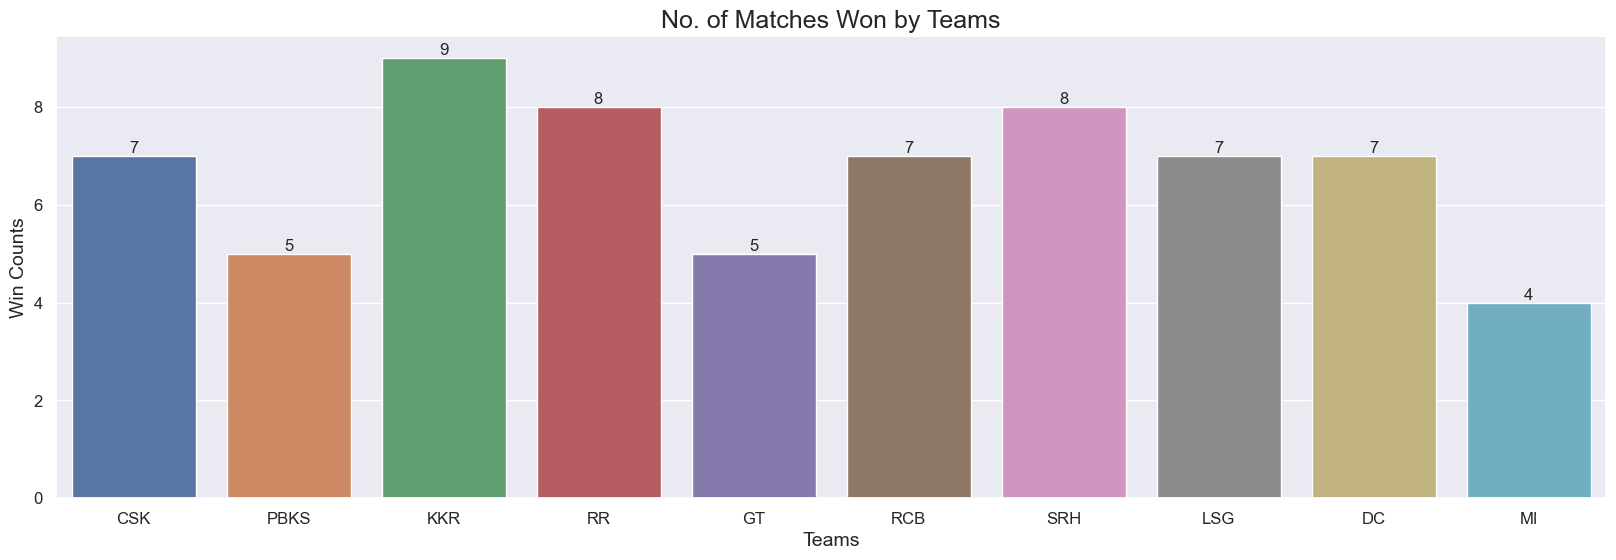

In [41]:
axs0 = sns.countplot(data = df, x = 'winner')

for i in axs0.containers:
    axs0.bar_label(i, fontsize=12)
    
plt.xlabel("Teams")
plt.ylabel("Win Counts")
plt.title("No. of Matches Won by Teams")

plt.show()

### Display toss decision.

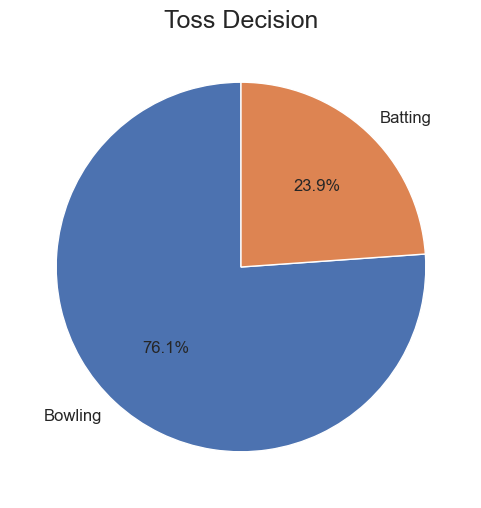

In [42]:
toss_decision_counts = df["toss_decision"].value_counts()

plt.pie(toss_decision_counts.values, labels=toss_decision_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Toss Decision", fontsize=18)

plt.show()

### Display matches won by toss winner vs toss loser.

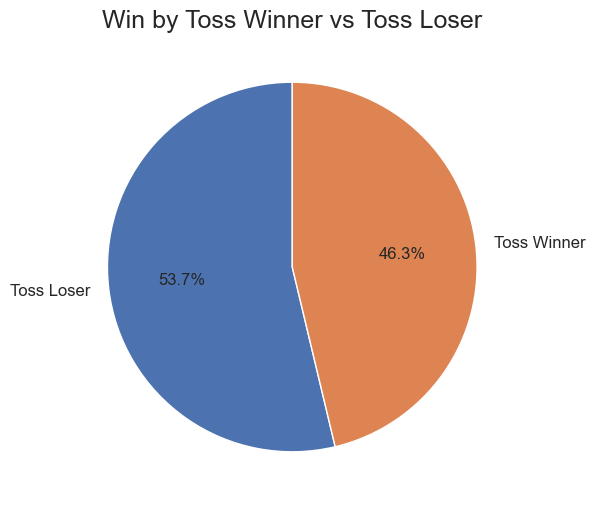

In [43]:
won_by_counts = df["won_by_team"].value_counts()

plt.pie(won_by_counts.values, labels=won_by_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Win by Toss Winner vs Toss Loser", fontsize=18)

plt.show()

### Display wins by Defending team vs Chasing Team.

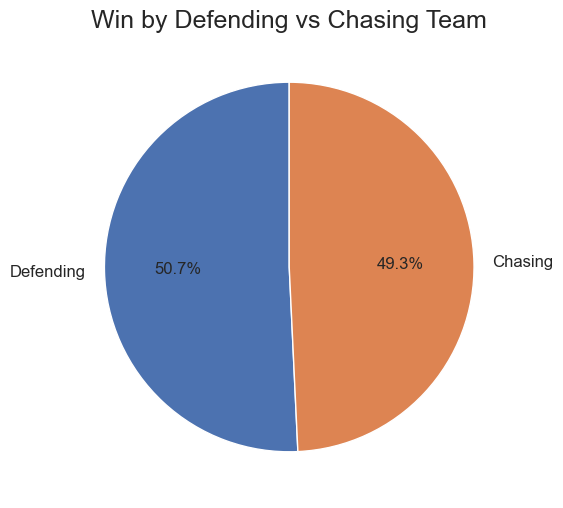

In [44]:
win_type_counts = df["won_type"].value_counts()

plt.pie(win_type_counts.values, labels=win_type_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Win by Defending vs Chasing Team", fontsize=18)

plt.show()

### Display Top 5 First Innings Score.

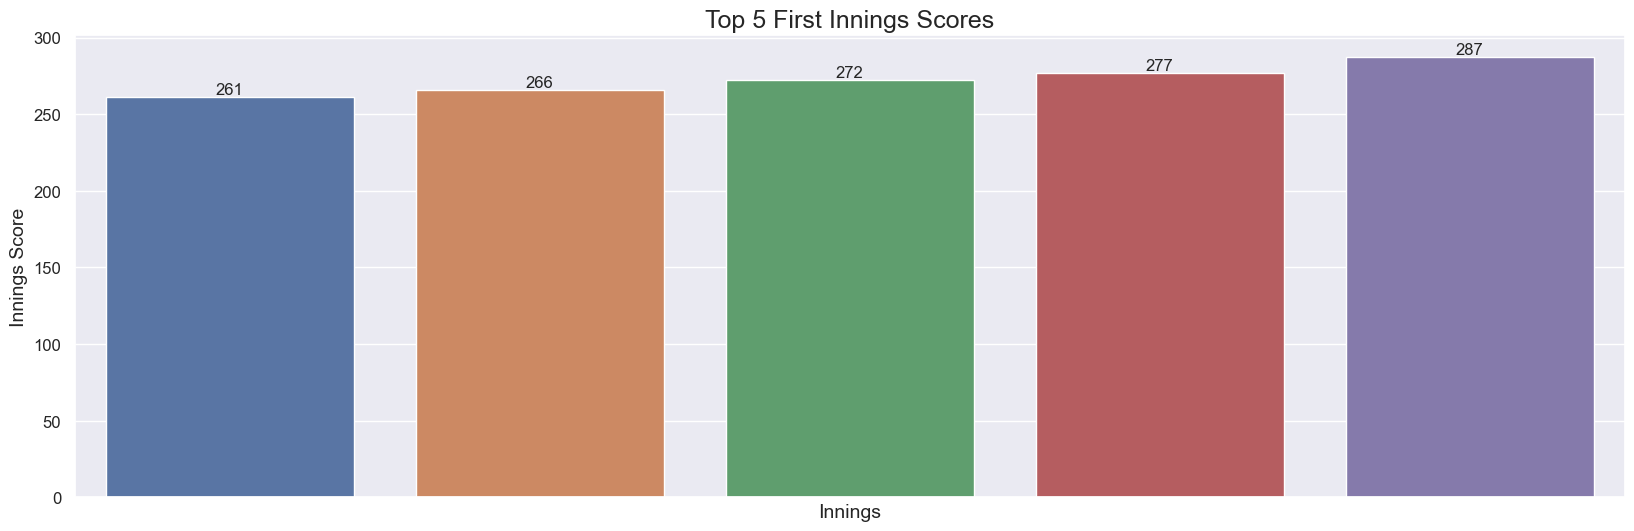

In [45]:
unique_f_inn = pd.DataFrame(df["first_innings_score"].drop_duplicates())

top_five_first_innings = unique_f_inn["first_innings_score"].nlargest(5)

axs2 = sns.barplot(data=top_five_first_innings,
            x=top_five_first_innings.index,
            y=top_five_first_innings.values
           )
for i in axs2.containers:
    axs2.bar_label(i, fontsize=12)

plt.xlabel("Innings")
plt.ylabel("Innings Score")
plt.title("Top 5 First Innings Scores")

axs2.set(xticks=[])  # Turn off x-axis ticks and labels

plt.show()

### Display Top 5 Second innings Score.

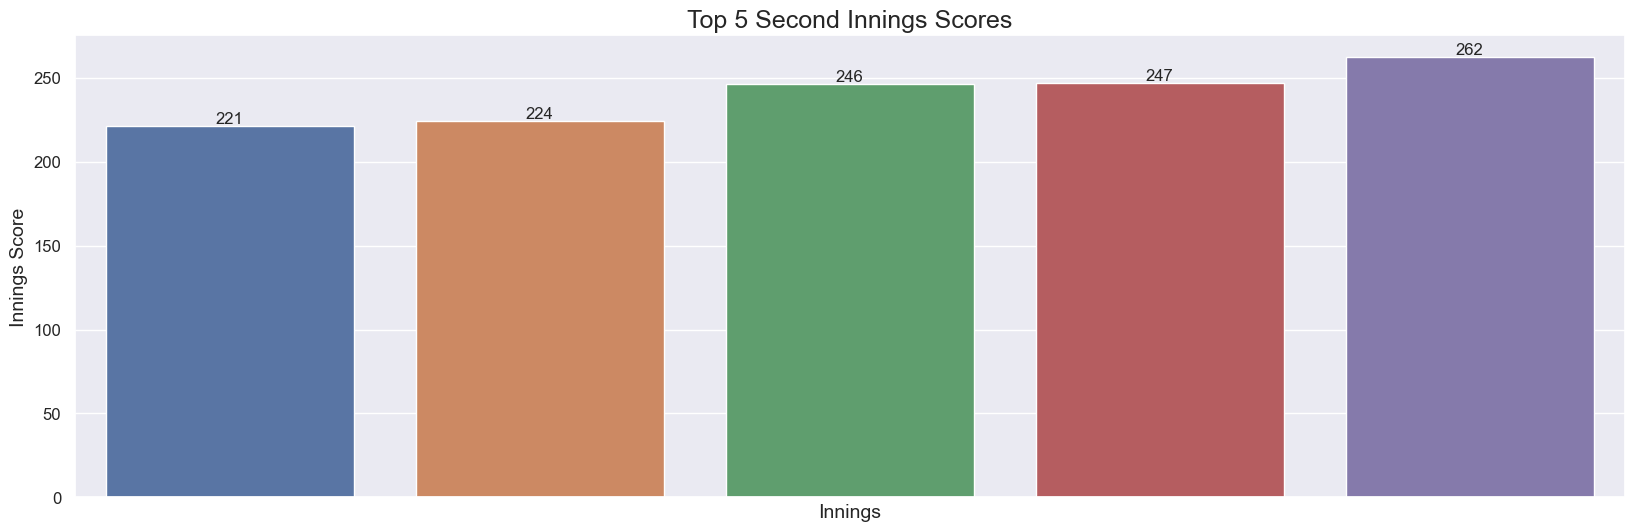

In [46]:
unique_s_inn = pd.DataFrame(df["second_innings_score"].drop_duplicates())
                            
top_five_sec_innings = unique_s_inn["second_innings_score"].nlargest(5)

axs3 = sns.barplot(data=top_five_sec_innings,
            x=top_five_sec_innings.index,
            y=top_five_sec_innings.values
           )
for i in axs3.containers:
    axs3.bar_label(i, fontsize=12)

plt.xlabel("Innings")
plt.ylabel("Innings Score")
plt.title("Top 5 Second Innings Scores")

axs3.set(xticks=[])  # Turn off x-axis ticks and labels

plt.show()

### Display Average 1st innings Score by Venue Location.

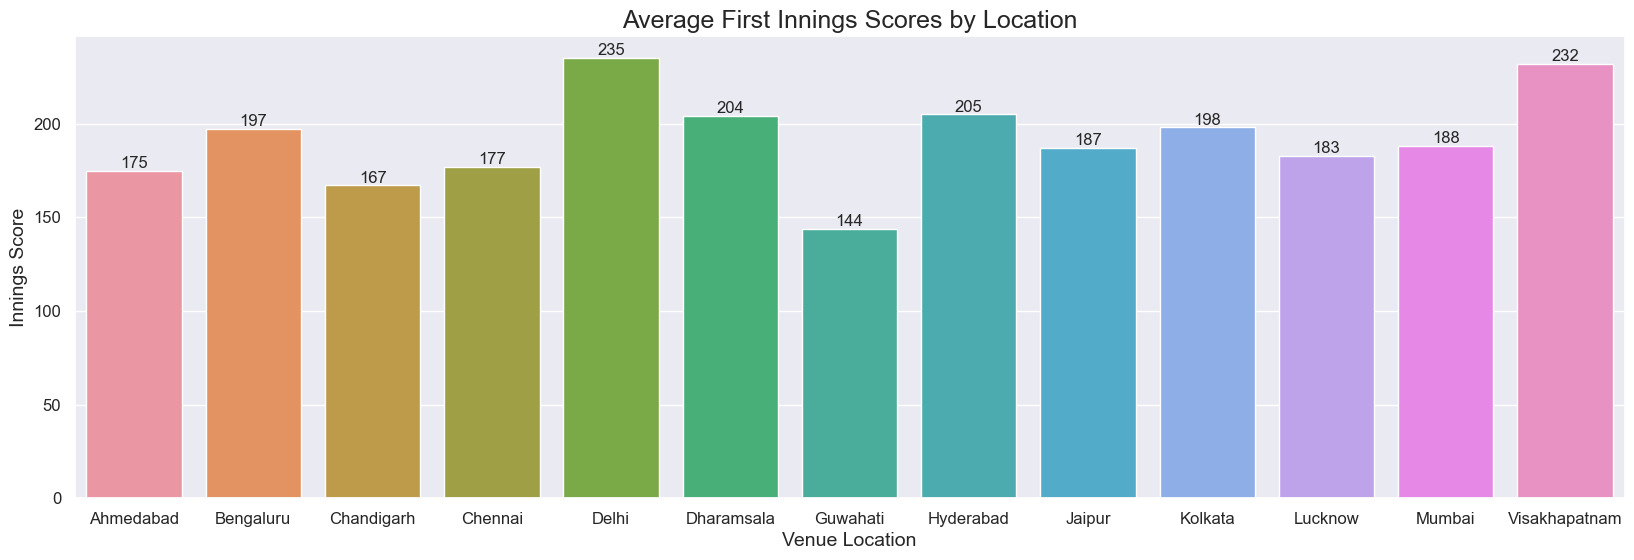

In [47]:
venue_score_f = df.groupby("venue_location")["first_innings_score"].mean().reset_index()

axs4 = sns.barplot(data=venue_score_f,
            x=venue_score_f["venue_location"],
            y=round(venue_score_f["first_innings_score"])
           )
for i in axs4.containers:
    axs4.bar_label(i, fontsize=12)

plt.xlabel("Venue Location")
plt.ylabel("Innings Score")
plt.title("Average First Innings Scores by Location")

plt.show()

### Display Average 2nd innings Score by Venue Location.

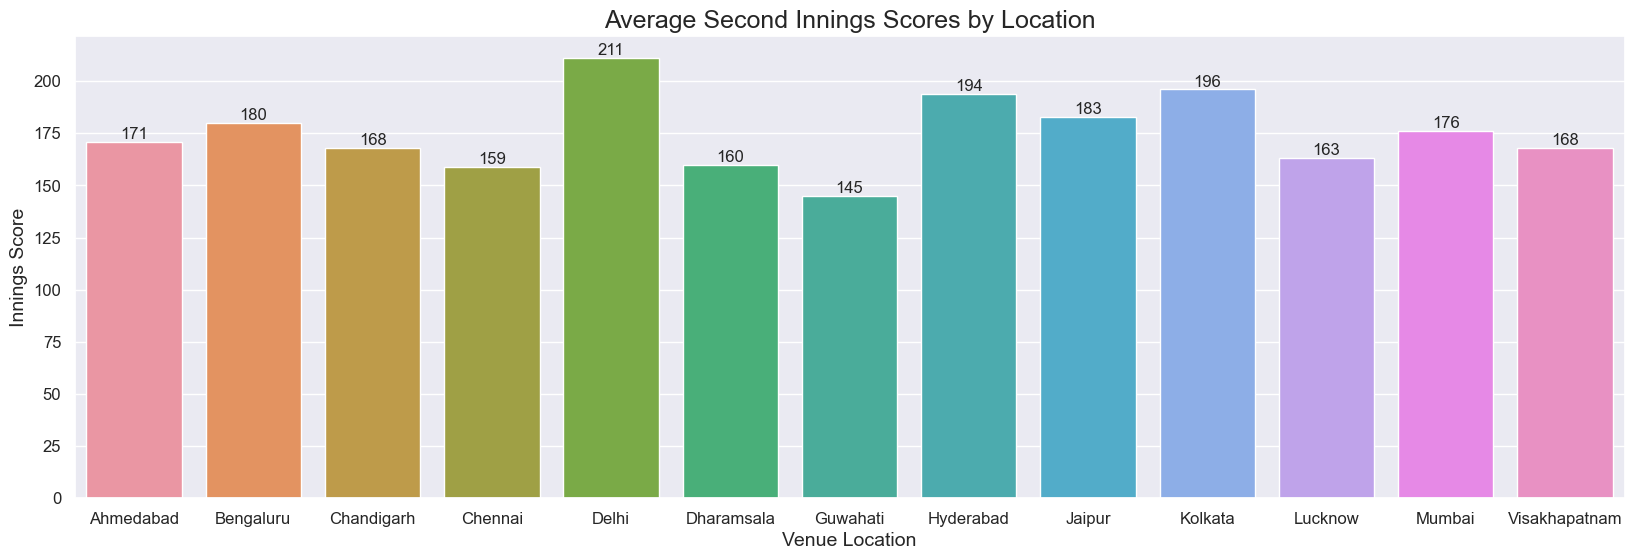

In [48]:
venue_score_s = df.groupby("venue_location")["second_innings_score"].mean().reset_index()

axs5 = sns.barplot(data=venue_score_s,
            x=venue_score_s["venue_location"],
            y=round(venue_score_s["second_innings_score"])
           )
for i in axs5.containers:
    axs5.bar_label(i, fontsize=12)

plt.xlabel("Venue Location")
plt.ylabel("Innings Score")
plt.title("Average Second Innings Scores by Location")

plt.show()

### Display Average First Innings Run Rate by Venue Location.

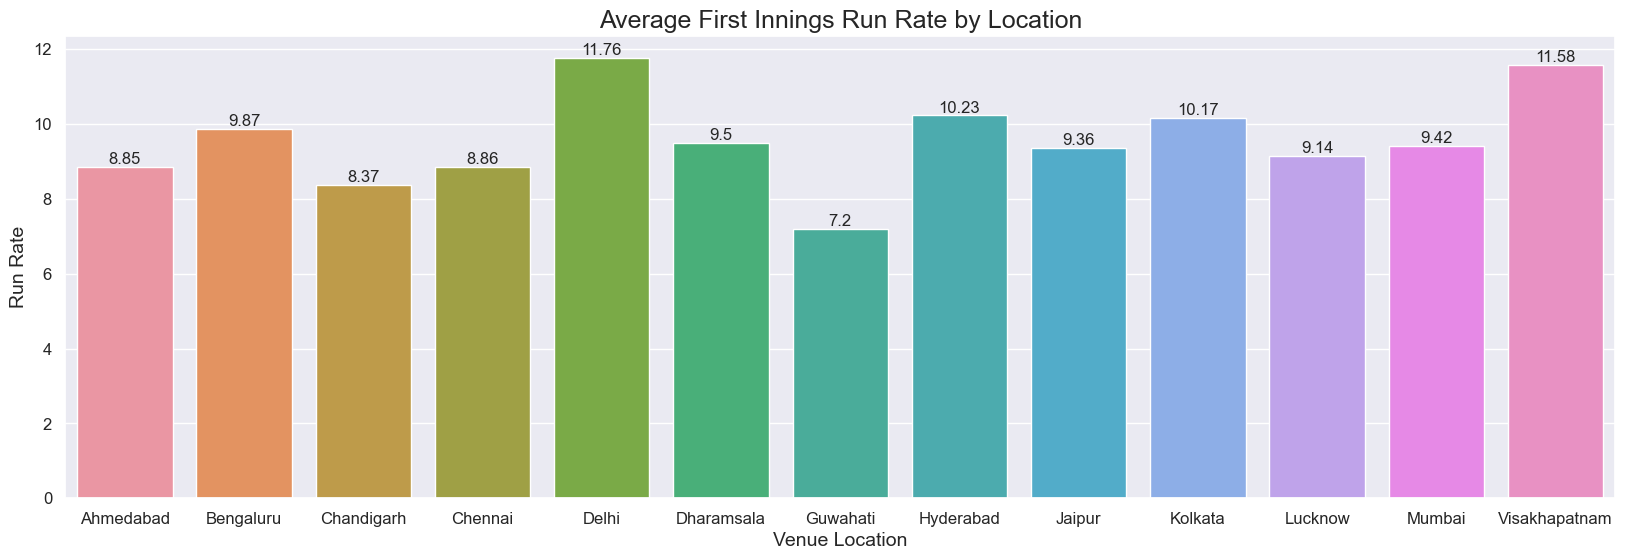

In [49]:
venue_rr_f = df.groupby("venue_location")["first_innings_run_rate"].mean().reset_index()

axs6 = sns.barplot(data=venue_rr_f,
            x=venue_score_s["venue_location"],
            y=round(venue_rr_f["first_innings_run_rate"],2)
           )
for i in axs6.containers:
    axs6.bar_label(i, fontsize=12)

plt.xlabel("Venue Location")
plt.ylabel("Run Rate")
plt.title("Average First Innings Run Rate by Location")

plt.show()

### Display Average Second Innings Run Rate by Venue Location.

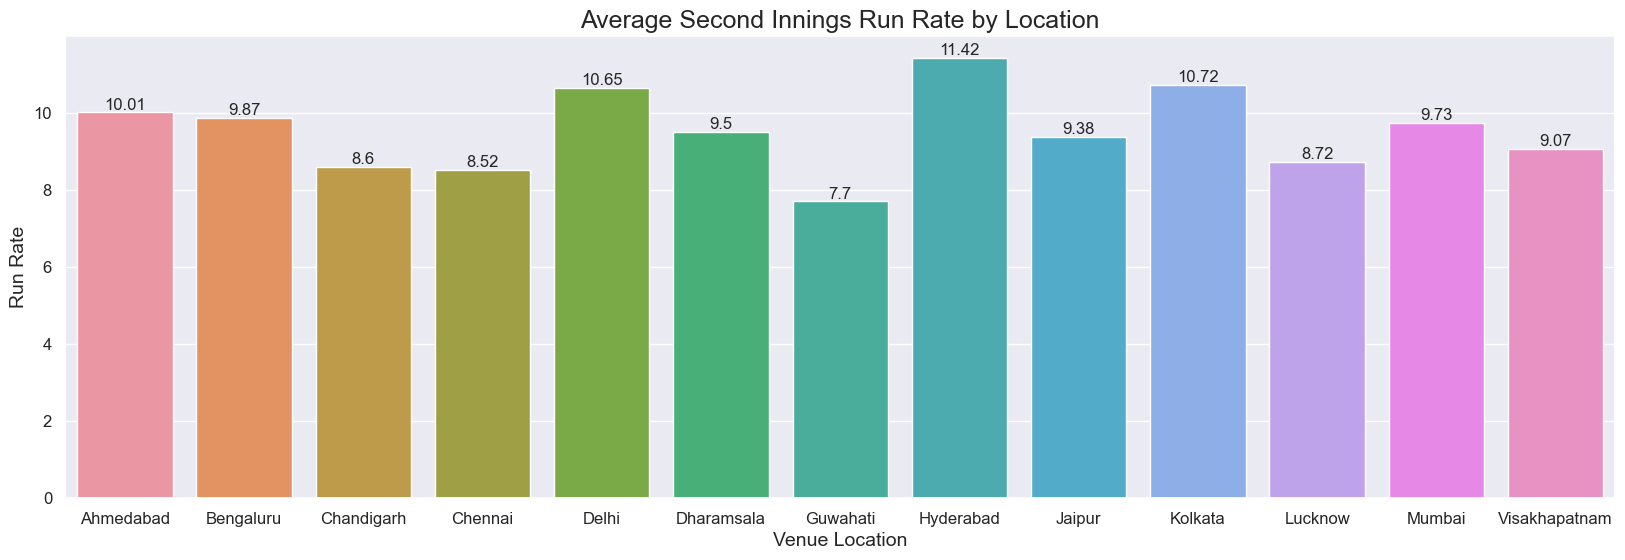

In [50]:
venue_rr_s = df.groupby("venue_location")["second_innings_run_rate"].mean().reset_index()

axs7 = sns.barplot(data=venue_rr_s,
                   x=venue_rr_s["venue_location"],
                   y=round(venue_rr_s["second_innings_run_rate"],2)
                  )
for i in axs7.containers:
    axs7.bar_label(i, fontsize=12)

plt.xlabel("Venue Location")
plt.ylabel("Run Rate")
plt.title("Average Second Innings Run Rate by Location")

plt.show()

### Display Average 1st innings Score by Teams

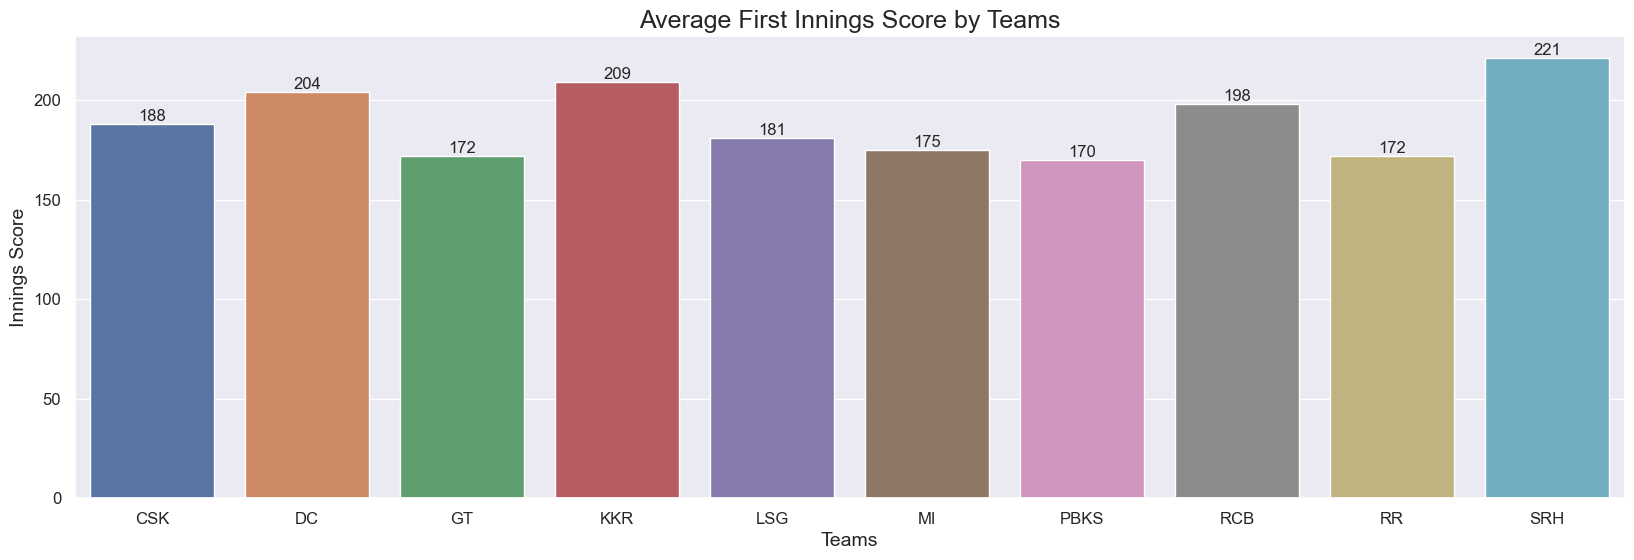

In [53]:
team_f_inn = df.groupby("first_batting")["first_innings_score"].mean().reset_index()

axs8 = sns.barplot(data=venue_rr_s,
                   x=team_f_inn["first_batting"],
                   y=round(team_f_inn["first_innings_score"])
                  )
for i in axs8.containers:
    axs8.bar_label(i, fontsize=12)

plt.xlabel("Teams")
plt.ylabel("Innings Score")
plt.title("Average First Innings Score by Teams")

plt.show()

### Display Average 2nd innings Score by Teams

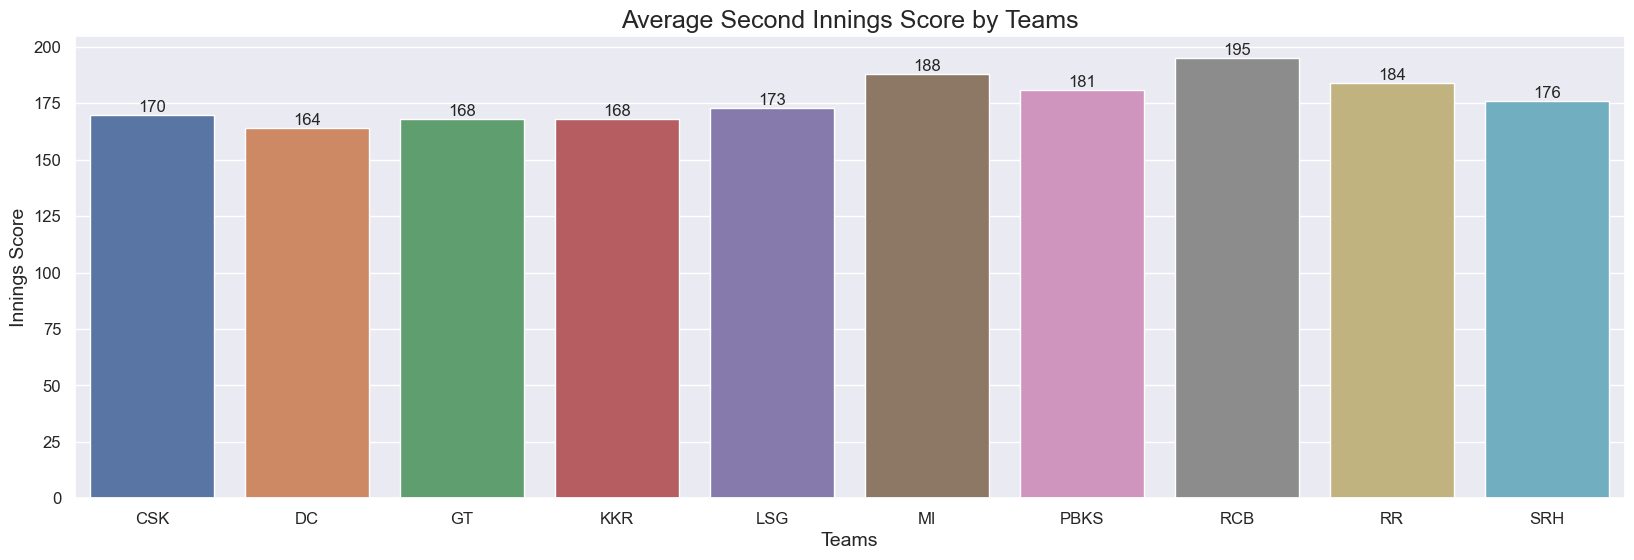

In [54]:
team_s_inn = df.groupby("second_batting")["second_innings_score"].mean().reset_index()

axs9 = sns.barplot(data=venue_rr_s,
                   x=team_s_inn["second_batting"],
                   y=round(team_s_inn["second_innings_score"])
                  )
for i in axs9.containers:
    axs9.bar_label(i, fontsize=12)

plt.xlabel("Teams")
plt.ylabel("Innings Score")
plt.title("Average Second Innings Score by Teams")

plt.show()